In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
LATENT_DIM = 64
p = np.array([0.2, 0.1, 0.05, 0.05, 0.3, 0.02, 0.08, 0.15, 0.04, 0.01])
categories = list(range(len(p)))

SIMULATION_ITERS = 10_000

In [61]:
def generate_indices():
    return [np.random.choice(categories, p=p) for _ in range(LATENT_DIM)]

In [62]:
def simulate():
    return np.array([generate_indices() for _ in range(SIMULATION_ITERS)]).T

In [63]:
buffer = simulate()
print(buffer.shape)
print(buffer)

(64, 10000)
[[1 6 7 ... 1 1 1]
 [8 4 3 ... 6 0 9]
 [4 0 6 ... 2 8 1]
 ...
 [0 8 0 ... 7 3 6]
 [7 4 0 ... 7 4 6]
 [7 8 0 ... 4 4 8]]


In [64]:
def hist_1d(arr):
    return np.array([(arr == c).sum() for c in categories])

counts = np.apply_along_axis(hist_1d, axis=1, arr=buffer)

In [65]:
empirical_probabilities = counts / counts.sum(axis=-1).reshape(-1, 1)
empirical_probabilities

array([[0.197 , 0.1014, 0.0514, 0.0492, 0.3024, 0.0204, 0.0831, 0.1487,
        0.0377, 0.0087],
       [0.1994, 0.0993, 0.0505, 0.049 , 0.298 , 0.0195, 0.0825, 0.1552,
        0.0371, 0.0095],
       [0.1947, 0.1051, 0.0513, 0.0493, 0.3028, 0.0188, 0.0762, 0.1514,
        0.0395, 0.0109],
       [0.1948, 0.0985, 0.0476, 0.05  , 0.2998, 0.0185, 0.087 , 0.1504,
        0.0428, 0.0106],
       [0.2022, 0.0989, 0.0477, 0.0531, 0.3013, 0.0193, 0.0785, 0.1508,
        0.038 , 0.0102],
       [0.2039, 0.0966, 0.0504, 0.0489, 0.2991, 0.02  , 0.0807, 0.1483,
        0.0428, 0.0093],
       [0.202 , 0.1064, 0.0501, 0.05  , 0.2894, 0.0179, 0.0857, 0.15  ,
        0.039 , 0.0095],
       [0.2011, 0.1003, 0.0508, 0.0503, 0.2975, 0.0194, 0.076 , 0.156 ,
        0.0373, 0.0113],
       [0.1985, 0.0966, 0.0505, 0.0533, 0.2971, 0.0204, 0.0825, 0.15  ,
        0.0412, 0.0099],
       [0.2038, 0.105 , 0.0476, 0.0474, 0.2925, 0.0218, 0.0782, 0.1525,
        0.0407, 0.0105],
       [0.1975, 0.102 , 0.0465

In [66]:
p

array([0.2 , 0.1 , 0.05, 0.05, 0.3 , 0.02, 0.08, 0.15, 0.04, 0.01])

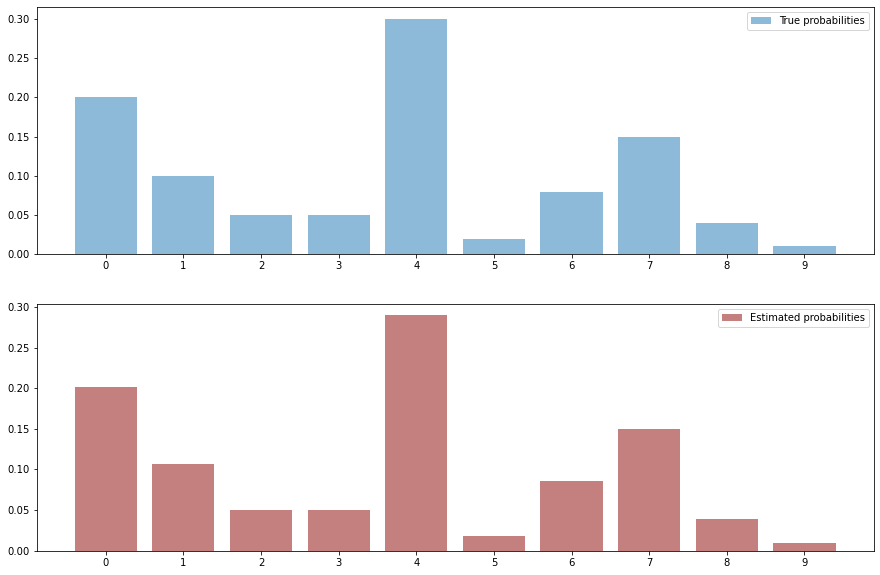

In [91]:
rand_idx = np.random.randint(empirical_probabilities.shape[0])
sample = empirical_probabilities[rand_idx]

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15, 10)

axs[0].bar(categories, height=p, alpha=0.5, label="True probabilities")
axs[0].legend()
axs[0].set_xticks(categories)

axs[1].bar(categories, height=sample, alpha=0.5, label="Estimated probabilities", color='darkred')
axs[1].legend()
axs[1].set_xticks(categories)

plt.show()